# iFood CRM Data Analyst Case

Data analysis of iFood data case. The objective is to build a predictive model which will produce the highest profit for the next marketing campaign by predicting customers most likely to purchase the offer.
The next market campaign (the sixth) aims at selling a new gadget to the Customer Database. In order to build the model, a pilot campaign involving 2240 customers was carried out.

This study is divided in two parts. The first part consists of an Exploratory Data Analysis and the second part is a predictive model for the campaign.

## Part 1 - EDA

The analysis involves understanding the data set, its correlation with itself and with the target value and inconsistencies. 

The data set consist of the following columns:

- AcceptedCmp1 - 1 if a customer accepted the offer in the 1st campaign;
- AcceptedCmp2 - 1 if a customer accepted the offer in the 1st campaign;
- AcceptedCmp3 - 1 if a customer accepted the offer in the 1st campaign;
- AcceptedCmp4 - 1 if a customer accepted the offer in the 1st campaign;
- AcceptedCmp5 - 1 if a customer accepted the offer in the 1st campaign;
- Response (target) - 1 if a customer accepted the offer in the 1st campaign;
- Complain - 1 if customer complained in the last  years;
- DtCustomer - date of customer's enrollment with the company;
- Education - customer's level of education;
- Martial_Status - customer's martial status;
- Kidhome - number of small children in customer's household;
- Teenhome - number of teenagers in customer's household;
- Income - customer's yearly household income;
- MntFishProducts - amount spent on fish products in the last 2 years;
- MntMeatProducts - amount spent on meat products in the last 2 years;
- MntFruits - amount spent on fruits products in the last 2 years;
- MntSweetProducts - amount spent on sweet products in the last 2 years;
- MntWines - amount spent on wines products in the last 2 years;
- MntGoldProds - amount spent on gold products in the last 2 years;
- NumDealsPurchases - number of purchases made with discount;
- NumCatalogPurchases - number of purchases made using catalogue;
- NumStorePurchases - number of purchases made directly in stores;
- NumWebPurchases - number of purchases made through company's website;
- NumWebVisitsMonth - number of visits to company's web site in the last month;
- Recency - number of days since last purchase;
- Year_Birth - customer's year of birth;
- Z_CostContact - cost of the 6th campaign per customer;
- Z_Revenue - revenue of the 6th campaign per customer.

The target value is the Response feature, customers who responded the campaign by buying the product.
    

In [3]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import statistics as sts
import numpy as np
import math as mt
import scipy as scipy
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

In [4]:
# Import data set
data = pd.read_csv('ml_project1_data.csv')

# Taking a look into the data
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Some superficial analysis of the data set:
- The data set contains 29 columns and 2240 rows, a small dataset.
- There are missing values in the Income column. 
- There are three columns which are categoricals (Education, Marital_Status, Dt_Customer)

In [6]:
# Taking a closer look into the numerical columns
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


It is already possible to see some inconsistences in the data set. One of these inconsistences is in the Year_Birth column, considering that the data is current, it is highly suspicious someone is 127 years old.

In [7]:
data.Response.value_counts(normalize=True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

Only 15% of the people bought the gadget in the 6th campaign. 
It is an unbalanced data set.

### 1.1   Age - Year_Birth Parameter

This section is intended to analyse if there is a pattern of who bought the product based in their age. 
For this analysis the Year_Birth column will be transformed into a more insightful parameter, Age. 

One of the reasons to transform into age is that usually customer segmentation is contextualized with the age when the person purchased the product, some products are meant for specific ages, in other words someone could buy something today that they would not buy if they were ten years older. 

However, in order to maintain it real, it would be necessary to know when was the purchase made and the date of the data set. Since this information is not available, I assumed it is in the current year, 2020.

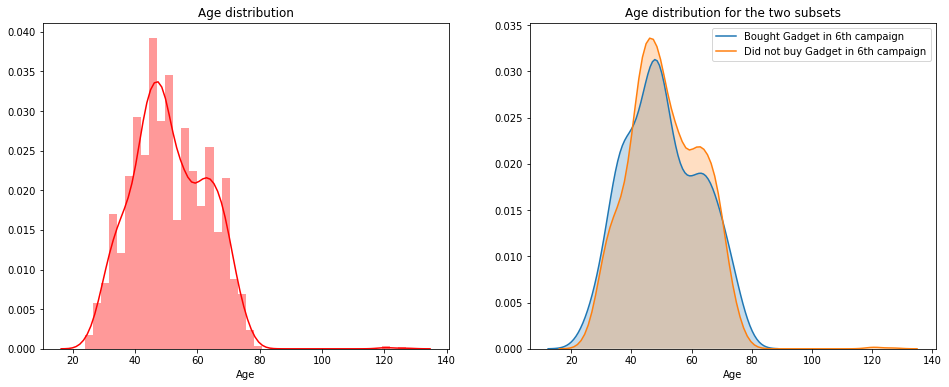

In [8]:
# Defining age instead of Year_Birth for analysis
cols_age = ['ID', 'Year_Birth', 'Response']
data_age = data[cols_age].copy()

for i in range(len(data_age.Year_Birth)):
    data_age.loc[i,'Year_Birth'] = 2020 - data_age.loc[i,'Year_Birth']
data_age.rename(columns = {'Year_Birth': 'Age'}, inplace = True)

# Plotting
fig, axarr = plt.subplots(1, 2, figsize = (16,6))

axarr[0].set_title('Age distribution')
f = sns.distplot(data_age['Age'], color = 'red', bins = 40, ax = axarr[0])

axarr[1].set_title('Age distribution for the two subsets')
g = sns.kdeplot(data_age['Age'].loc[data_age['Response'] == 1], 
                shade = True, ax = axarr[1], label = 'Bought Gadget in 6th campaign').set_xlabel('Age')
g = sns.kdeplot(data_age['Age'].loc[data_age['Response'] == 0], 
                shade = True, ax = axarr[1], label = 'Did not buy Gadget in 6th campaign')

Some observations from the graphs: 
 - Visually, age does not seem to have a correlation with the Response target. 
 - People involved in the dataset have between 20 and 80 years old.
 - Data is not totally accurate, as noticed before, since there is someone with age higher than 120 years old.


In [9]:
# Finding people too old to be correct 
old_people = {}
for i in range(len(data_age.Age)):
    if data_age.Age[i] > 80:
        old_people[data_age.ID[i]] = data_age.Age[i]
print(old_people)

{7829: 120, 11004: 127, 1150: 121}


ID 11004, 7829 and 1150 theorically are more than 119 years old, which is not very plausible, not so many people in the world are this age, and it is unlikely they were contacted by our personnel. 

There are mainly three possible ways to deal with this inconsistent data: 

  (1) Erase the entire row. However it is not too good since our database is small and this will turn it smaller;    
  
  (2) Delete only the data regarding the age and use an imputer during the preprocessing of our data; 
  
  (3) Delete the entire column, if the age is not correlated to the target variable.

In order to decide between the possibilities, let's take a look into the entire row of this IDs and see if other parameters are strange.

In [10]:
data_year = data.set_index('ID').copy()
for key in old_people:
    print(data_year.loc[key])

Year_Birth                   1900
Education                2n Cycle
Marital_Status           Divorced
Income                      36640
Kidhome                         1
Teenhome                        0
Dt_Customer            2013-09-26
Recency                        99
MntWines                       15
MntFruits                       6
MntMeatProducts                 8
MntFishProducts                 7
MntSweetProducts                4
MntGoldProds                   25
NumDealsPurchases               1
NumWebPurchases                 2
NumCatalogPurchases             1
NumStorePurchases               2
NumWebVisitsMonth               5
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Complain                        1
Z_CostContact                   3
Z_Revenue                      11
Response                        0
Name: 7829, dtype: object
Year_Birth            

For now, since deleting the column may cause loss of valuable information, the way to deal with this inconsistence will be to impute a value in the year_birth for these three IDs. Since it is a small number of wrong ages, in order to reduce the impact in the analysis, it will preliminary be imputed the median in theses IDs.

In [41]:
for key in old_people:
    data_year.Year_Birth.loc[key] = data_year.Year_Birth.median()

/home/lais/.local/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


### 1.2 Education 
This section analyses the pattern of who bought the product based in their education.

There are five possible education possibilities: Basic, 2n Cycle, Graduation, Master and PhD.


In [12]:
data_year.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

The distribution of them regarding the target value are below.

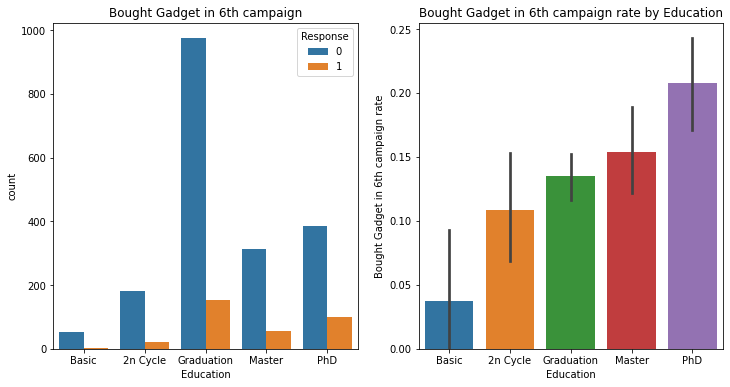

In [13]:
fig, axarr = plt.subplots(1,2,figsize = (12,6))
a = sns.countplot(x = 'Education', hue = 'Response', data = data_year, order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'],
                  ax=axarr[0]).set_title('Bought Gadget in 6th campaign')
axarr[1].set_title('Bought Gadget in 6th campaign rate by Education')
b = sns.barplot(x = 'Education', y = 'Response', data = data_year, order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'],
                ax = axarr[1]).set_ylabel('Bought Gadget in 6th campaign rate')

The customers in the data set have mostly high education completed (Graduation, Master and PhD), the number of Basic and 2n Cycle education are the smallest. The majority of the customers has Graduation level of education.

At first, education  does not look good regarding the Response variable as well. By itself it is possible to see that the rates of a positive target according to its education are very low. So there is no straightforward correlation. Although, it shows that the higher the level of education, the higher is the response rate (rate of customers who purchased the gadget in the 6th campaign). 


### 1.3 Marital Status 

This section analyses the pattern of who bought the product based in their marital status.


In [14]:
data_year.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

There are 8 diferent types of marital status entries in the data set.
Two of these status do not look correct (Absurd and YOLO) and two status (Together and Alone) could be joined with others (Married and Single).

Legaly, Married and Together are not the same thing, however their meaning are similar, so for this study it suits to place both in the same category.

For the 'Absurd' and 'YOLO' category, let's look for this cases to see if there is any other incorrect input in these rows. If it appears these rows are too wrong, the decision will be to erase them, if only this column has inconsistent data, the row will be kept but the information imputed.

In [15]:
for i in data_year.index:
    if data_year.Marital_Status.loc[i] == 'Absurd' or data_year.Marital_Status.loc[i] == 'YOLO':
        print(data_year.loc[i])

Year_Birth                   1993
Education              Graduation
Marital_Status             Absurd
Income                      79244
Kidhome                         0
Teenhome                        0
Dt_Customer            2012-12-19
Recency                        58
MntWines                      471
MntFruits                     102
MntMeatProducts               125
MntFishProducts               212
MntSweetProducts               61
MntGoldProds                  245
NumDealsPurchases               1
NumWebPurchases                 4
NumCatalogPurchases            10
NumStorePurchases               7
NumWebVisitsMonth               1
AcceptedCmp3                    0
AcceptedCmp4                    0
AcceptedCmp5                    1
AcceptedCmp1                    1
AcceptedCmp2                    0
Complain                        0
Z_CostContact                   3
Z_Revenue                      11
Response                        1
Name: 7734, dtype: object
Year_Birth            

Analyzing the IDs, there are some conclusions:
 - The IDs with 'Absurd' marital_status do not seem to have any other variable visually wrong. Although, the fact the marital status was wrongly inputed indicates that there is something strange with these rows, since it brings the question as to whether the other answers are correct or not, they do not have any other data which appears wrong, for now let's keep it in the database, but change the Marital_Status for the most frequent one.
 - The IDs with 'YOLO' marital_status are clearly a duplicate but with opposite target value (Response). If it was possible to know how this database was built we could keep the correct row and erase the other. Theorically the "Response" with value 1 is the most reliable, since it would be expected that the company know if a product was bought from them. However, as this is the second variable incorrect from this ID, for this study, it was prefereable to erase both rows with "YOLO" marital_status.

In [16]:
# Dealing with the "Absurd" and "YOLO" Marital_Status
data_marital = data_year.copy()
for i in data_marital.index:  
    if data_marital.Marital_Status.loc[i] == 'YOLO':
        data_marital.drop(i, inplace = True)

data_marital.Marital_Status = data_marital.Marital_Status.map({'Alone': 'Single', 'Single': 'Single',
                                                               'Absurd': 'Together', 'Together': 'Together',
                                                               'Married': 'Together','Divorced': 'Divorced',
                                                               'Widow': 'Widow'})

print(data_marital.Marital_Status.value_counts())

Together    1446
Single       483
Divorced     232
Widow         77
Name: Marital_Status, dtype: int64


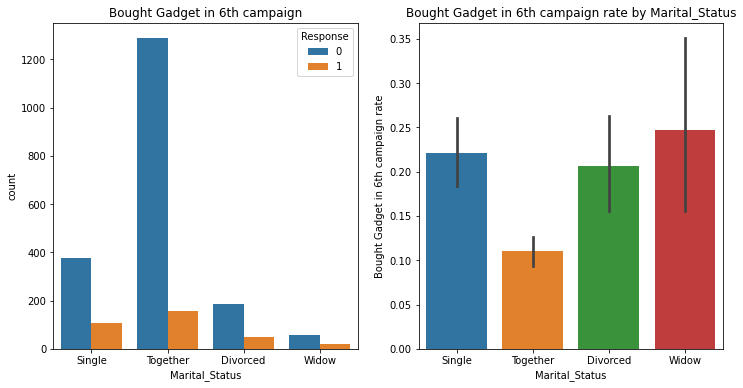

In [17]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x = 'Marital_Status', hue = 'Response', data = data_marital, 
                  ax=axarr[0]).set_title('Bought Gadget in 6th campaign')
axarr[1].set_title('Bought Gadget in 6th campaign rate by Marital_Status')
b = sns.barplot(x = 'Marital_Status', y = 'Response', data = data_marital, 
                ax = axarr[1]).set_ylabel('Bought Gadget in 6th campaign rate')

It appears there is no direct relation between the marital status and positive response in the 6th campaign.
Customers in the data set are mostly Together, either married or living together. The second most common status is Single. 

In percentage Widow status is the most likely to buy in the 6th campaign, however it is the status with the highest uncertainty and lowest number of respondent. 

### 1.4 Income

This section analyses the income of the customer and relationship that could be drawn from this parameter.

In [18]:
data_marital.Income.describe()

count      2214.000000
mean      52250.697832
std       25184.187770
min        1730.000000
25%       35265.000000
50%       51400.500000
75%       68592.000000
max      666666.000000
Name: Income, dtype: float64

The Income has a mean of 52250 with standard deviation of 25184, in other words, it has a standard deviation of its half value. This indicates that the income is sparse.

Only 2214 of the 2240 customer answered their income, the missing values will have to be imputed during the model construction.

In [19]:
# Find how many high salaries exists
print([i for i in data_marital.Income if i > 160000])

# Drop the salary of 666666  
data_income = data_marital.copy()
for i in data_income.index:  
    if data_income.Income.loc[i] >= 666666:
        data_income.drop(i, inplace = True)

[162397.0, 160803.0, 666666.0]


The salary of 666666 appears to be extremely high (more than 10 times the standard deviation), having it in the database will only make predictions inaccurate. In order to avoid this, this salary was dropped.

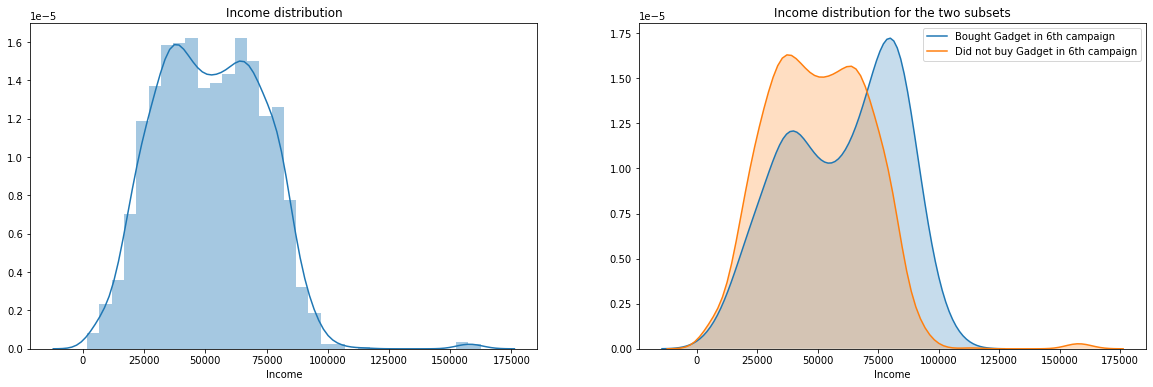

In [20]:
fig, axarr = plt.subplots(1, 2, figsize = (20,6))

axarr[0].set_title('Income distribution')
sns.distplot(data_income.Income, ax = axarr[0]) 

axarr[1].set_title('Income distribution for the two subsets')
g = sns.kdeplot(data_income.Income.loc[data_income.Response == 1], 
                shade = True, ax = axarr[1], label = 'Bought Gadget in 6th campaign').set_xlabel('Income')
g = sns.kdeplot(data_income.Income.loc[data_income.Response == 0], 
                shade = True, ax = axarr[1], label = 'Did not buy Gadget in 6th campaign')


There is a tendency of customer with high income to respond to the 6th campaign. It is possible to see a peak of positive responses around 90,000 of income.

In order to improve the analysis, the income will be divided into bins: Low, Medium, High and Very High income.

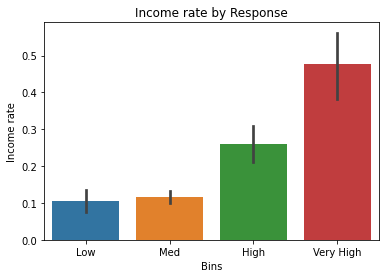

In [21]:
# Dividing income into bins
data_income_bins = data_income.copy()
mean_df = data_income_bins.Income.mean() 
std_df = data_income_bins.Income.std()

def Mod_row(row, mean_df, std_df):
    if row.Income <= mean_df - std_df:
        return 'Low'
    if row.Income < mean_df + std_df and row.Income > mean_df - std_df:
        return 'Med'
    if row.Income > mean_df + 1.5 * std_df:
        return 'Very High'
    if row.Income >= mean_df + std_df:
        return 'High'

data_income_bins['Bins'] = data_income_bins.apply(lambda row: Mod_row(row, mean_df, std_df), axis = 1)

plt.title('Income rate by Response')
y = sns.barplot(x = data_income_bins.Bins, y = data_income_bins.Response, order = ['Low', 'Med', 'High', 'Very High']).set_ylabel('Income rate')

This barplot indicates the main public who bought the gadget in the 6th Campaign were the one with very high income, above 1.5 standard deviation.

Knowning that usually the people with very high household income bought in the 6th campaign, in order to determine their profile, other parameters will be compared inside this group.

#### 1.4.1 High Income x Marital Status

The subgroup of high and very high income are separated from the rest of the data set in order to define the main caracteristics of these subgroup.

Bins  Marital_Status
High  Divorced           27
      Single             53
      Together          192
      Widow              12
dtype: int64
Bins       Marital_Status
Very High  Divorced          10
           Single            35
           Together          58
           Widow              2
dtype: int64


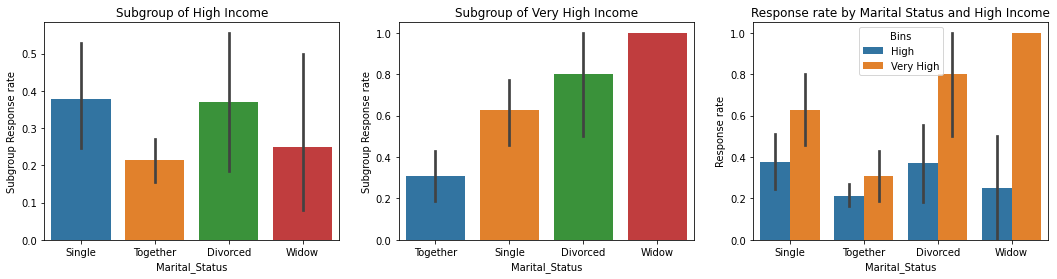

In [22]:
high_income = data_income_bins.loc[data_income_bins['Bins'].isin(['High'])]
veryhigh_income = data_income_bins.loc[data_income_bins['Bins'].isin(['Very High'])]
bothhigh_income = data_income_bins.loc[data_income_bins['Bins'].isin(['High', 'Very High'])]
print(high_income.groupby(['Bins', 'Marital_Status']).size())
print(veryhigh_income.groupby(['Bins', 'Marital_Status']).size())

fig, axarr = plt.subplots(1, 3, figsize = (18, 4))
axarr[0].set_title('Subgroup of High Income')
y = sns.barplot(x = high_income.Marital_Status, y = high_income.Response, ax = axarr[0]).set_ylabel('Subgroup Response rate')
axarr[1].set_title('Subgroup of Very High Income')
y = sns.barplot(x = veryhigh_income.Marital_Status, y = veryhigh_income.Response, ax = axarr[1]).set_ylabel('Subgroup Response rate')
axarr[2].set_title('Response rate by Marital Status and High Income')
y = sns.barplot(x = bothhigh_income.Marital_Status, y = bothhigh_income.Response, hue = bothhigh_income.Bins).set_ylabel('Response rate')

Taking into account subgroups 'high + very high income' and only 'very high income' is possible to identify the profile of who bought in the 6th campaign, it is constituted of people who are "Single" or "Divorced". 

The "Together" parameter is the one with highest number of people, however is the one that presents the lowest target rate.

Although the "window" category in the subgroup of the very high income appears to have a strong correlation, it is not meaningful since it only has 2 entries.

#### 1.4.2 High income x Education
The subgroup of high and very high income are separated from the rest of the data set in order to define the main caracteristics of these subgroup.

Bins       Education 
High       2n Cycle       25
           Graduation    153
           Master         45
           PhD            61
Very High  2n Cycle        8
           Graduation     50
           Master         19
           PhD            28
dtype: int64


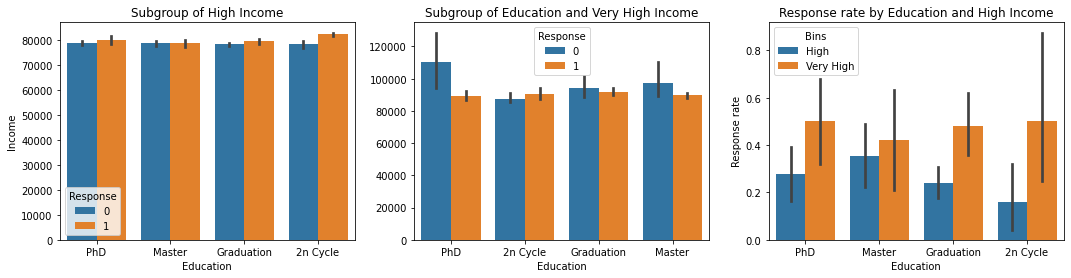

In [23]:
print(bothhigh_income.groupby(['Bins', 'Education']).size())

fig, axarr = plt.subplots(1, 3, figsize = (18, 4))
axarr[0].set_title('Subgroup of High Income')
y = sns.barplot(x = high_income.Education, y = high_income.Income, hue = high_income.Response, ax = axarr[0]).set_ylabel('Income')

axarr[1].set_title('Subgroup of Education and Very High Income')
y = sns.barplot(x = veryhigh_income.Education, y = veryhigh_income.Income, hue = veryhigh_income.Response, ax = axarr[1]).set_ylabel('')

axarr[2].set_title('Response rate by Education and High Income')
y = sns.barplot(x = bothhigh_income.Education, y = bothhigh_income.Response, hue = bothhigh_income.Bins).set_ylabel('Response rate')

There is no Basic level of education among the customer with high or very high income. 
As expected people with high income have a higher level of education, mostly Graduation or above.

### 1.5 Big Buyers (AcceptedCmp columns)

The next analysis will that into account five columns, to see if there is a connection with people who bought in a previous campaign will buy in the 6th campaign. 

The columns are: AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5.

In [24]:
# Separating in only the columns we are analyzing:
features = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
data_buyers = data_income[features].copy()
data_buyers.sum()

AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
Response        333
dtype: int64

Out of the 6 campaigns, the 6th appear to be the most successfull, with the higher number of sales by far.

The following analysis is made to see if one person is likely to buy more than once. The next barplot shows the frequency one person buys in more than one campaign. In other words, how many customers purchased only in one campaign, two campaigns, and so on.

{1: 369, 2: 142, 3: 51, 4: 36, 5: 10, 6: 0}


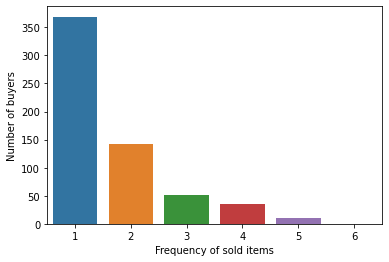

In [25]:
buyers = {}
for i in range(1,7):
    buyers[i] = data_buyers.sum(axis = 1).loc[data_buyers.sum(axis = 1) == i].count()

# Print the frequency of how many times a person bought 
print(buyers)

sns.barplot(list(buyers.keys()), list(buyers.values())).set(xlabel = 'Frequency of sold items', 
                                                            ylabel = 'Number of buyers');


The above analysis is for the overall sold items, it does not take into account the order in which the items were bought.

The calculated probability of the user of buying in the last campaign, knowing how many times they have bought before is addressed below. 

In [26]:
df_buyer = data_buyers.copy()
df_buyer['sum_cmp'] = data_buyers.iloc[:,0:5].sum(axis = 1)

case_list = df_buyer.groupby(['sum_cmp', 'Response']).size()

# Probability of buying in the last campaign, if has previous bought in another campaign 
# # Prob(B|A) = Prob(B and A) / Prob(A)
prob_B_and_A = case_list[1,1] + case_list[2,1]+ case_list[3,1] + case_list[4,1]
prob_B = prob_B_and_A + case_list[1,0] + case_list[2,0] + case_list[3,0] + case_list[4,0]
prob_any_item = prob_B_and_A / float(prob_B)
print('Probability of buying in the last campaign having bought any item before = {0}%' .format(round(prob_any_item*100,2)))

# Probability of buying in the last campaign, if has previous bought in one other campaign 
prob_1_item = case_list[1,1] / float(case_list[1,1] + case_list[1,0])
print('Probability of buying in the last campaign having bought 1 item before = {0}%' .format(round(prob_1_item*100,2)))

# Probability of buying in the last campaign, if has previous bought in one other campaign 
prob_2_item = case_list[2,1] / float(case_list[2,1] + case_list[2,0])
print('Probability of buying in the last campaign having bought 2 items before = {0}%' .format(round(prob_2_item*100,2)))

# Probability of buying in the last campaign, if has previous bought in one other campaign 
prob_3_item = case_list[3,1] / float(case_list[3,1] + case_list[3,0]) 
print('Probability of buying in the last campaign having bought 3 items before = {0}%' .format(round(prob_3_item*100,2)))

# Probability of buying in the last campaign, if has previous bought in one other campaign 
prob_4_item = case_list[4,1] / float(case_list[4,1] + case_list[4,0]) 
print('Probability of buying in the last campaign having bought 4 items before = {0}%' .format(round(prob_4_item*100,2)))

Probability of buying in the last campaign having bought any item before = 40.6%
Probability of buying in the last campaign having bought 1 item before = 31.08%
Probability of buying in the last campaign having bought 2 items before = 50.6%
Probability of buying in the last campaign having bought 3 items before = 79.55%
Probability of buying in the last campaign having bought 4 items before = 90.91%


As seen in the graph before, the number of buyers decreases with the number of campaigns bought. Although, the probability of buying the gadget in the last campaign having bought in 4 campaigns before is of 91%!

It is worth to notice that there is no record of someone who bought in all the campaigns.

Therefore, the probability of accepting the gadget in the last campaign increases with the number of campaigns the user has bought before, except if the buyer has bought in all the previous campaigns.

### 1.6 Amount Spent on Prodcuts

This section aims to study if there is a correlation between the amount spent on certain products and the positive response to the 6th campaign. Also, see if there is a relation between the amount spent and the income of the customer.

The columns analysed are: MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts and MntGoldProds.

In [27]:
data_spent = data_income.copy()
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Response', 'Income']
print(data_spent[features].describe())

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2237.000000  2237.000000      2237.000000      2237.000000   
mean    304.051408    26.328565       167.121144        37.568619   
std     336.764912    39.793145       225.817624        54.652835   
min       0.000000     0.000000         0.000000         0.000000   
25%      24.000000     1.000000        16.000000         3.000000   
50%     173.000000     8.000000        67.000000        12.000000   
75%     505.000000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds    Response         Income  
count       2237.000000   2237.000000  2237.00000    2213.000000  
mean          27.096111     44.037997     0.14886   51973.058744  
std           41.298221     52.197993     0.35603   21535.786524  
min            0.000000      0.000000     0.00000    1730.000000  
25%            1.000000      9.000000     0

Wine products have the highest mean (and standard deviation), in average it is the product segmentation where customers spend the most. Though, meat products have the highest maximum value of amount spent. Usually, meat and wine are more expensive than fruits and sweets, so it is expected that both have high maximum value and mean. 

Gold products seem to perform similar to fish and sweet products.

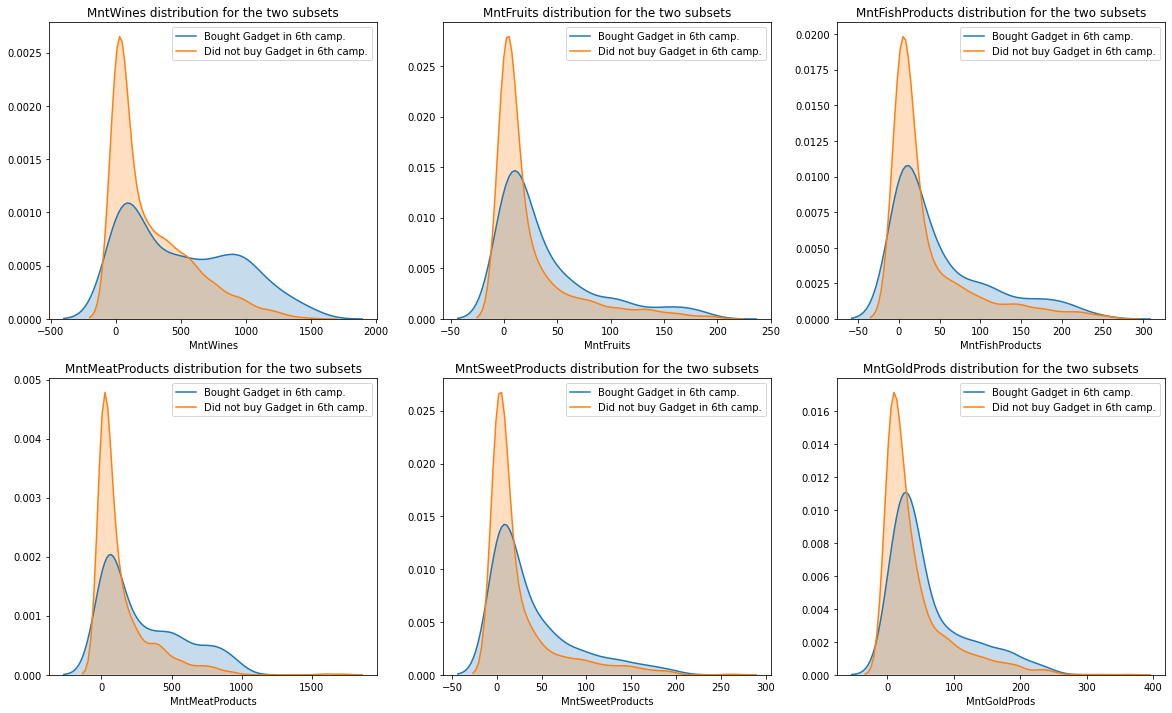

In [28]:
df = data_spent.copy()

fig, axarr = plt.subplots(2, 3, figsize = (20,12))

axarr[0,0].set_title('MntWines distribution for the two subsets')
g = sns.kdeplot(df.MntWines.loc[df.Response == 1], shade = True, ax = axarr[0, 0], label = 'Bought Gadget in 6th camp.').set_xlabel('MntWines')
g = sns.kdeplot(df.MntWines.loc[df.Response == 0], shade = True, ax = axarr[0, 0], label = 'Did not buy Gadget in 6th camp.')

axarr[0,1].set_title('MntFruits distribution for the two subsets')
f = sns.kdeplot(df.MntFruits.loc[df.Response == 1], shade = True, ax = axarr[0, 1], label = 'Bought Gadget in 6th camp.').set_xlabel('MntFruits')
f = sns.kdeplot(df.MntFruits.loc[df.Response == 0], shade = True, ax = axarr[0, 1], label = 'Did not buy Gadget in 6th camp.')

axarr[0,2].set_title('MntFishProducts distribution for the two subsets')
h = sns.kdeplot(df.MntFishProducts.loc[df.Response == 1], shade = True, ax = axarr[0, 2], label = 'Bought Gadget in 6th camp.').set_xlabel('MntFishProducts')
h = sns.kdeplot(df.MntFishProducts.loc[df.Response == 0], shade = True, ax = axarr[0, 2], label = 'Did not buy Gadget in 6th camp.')

axarr[1,0].set_title('MntMeatProducts distribution for the two subsets')
h = sns.kdeplot(df.MntMeatProducts.loc[df.Response == 1], shade = True, ax = axarr[1, 0], label = 'Bought Gadget in 6th camp.').set_xlabel('MntMeatProducts')
h = sns.kdeplot(df.MntMeatProducts.loc[df.Response == 0], shade = True, ax = axarr[1, 0], label = 'Did not buy Gadget in 6th camp.')

axarr[1, 1].set_title('MntSweetProducts distribution for the two subsets')
h = sns.kdeplot(df.MntSweetProducts.loc[df.Response == 1], shade = True, ax = axarr[1, 1], label = 'Bought Gadget in 6th camp.').set_xlabel('MntSweetProducts')
h = sns.kdeplot(df.MntSweetProducts.loc[df.Response == 0], shade = True, ax = axarr[1, 1], label = 'Did not buy Gadget in 6th camp.')

axarr[1, 2].set_title('MntGoldProds distribution for the two subsets')
h = sns.kdeplot(df.MntGoldProds.loc[df.Response == 1], shade = True, ax = axarr[1, 2], label = 'Bought Gadget in 6th camp.').set_xlabel('MntGoldProds')
h = sns.kdeplot(df.MntGoldProds.loc[df.Response == 0], shade = True, ax = axarr[1, 2], label = 'Did not buy Gadget in 6th camp.')

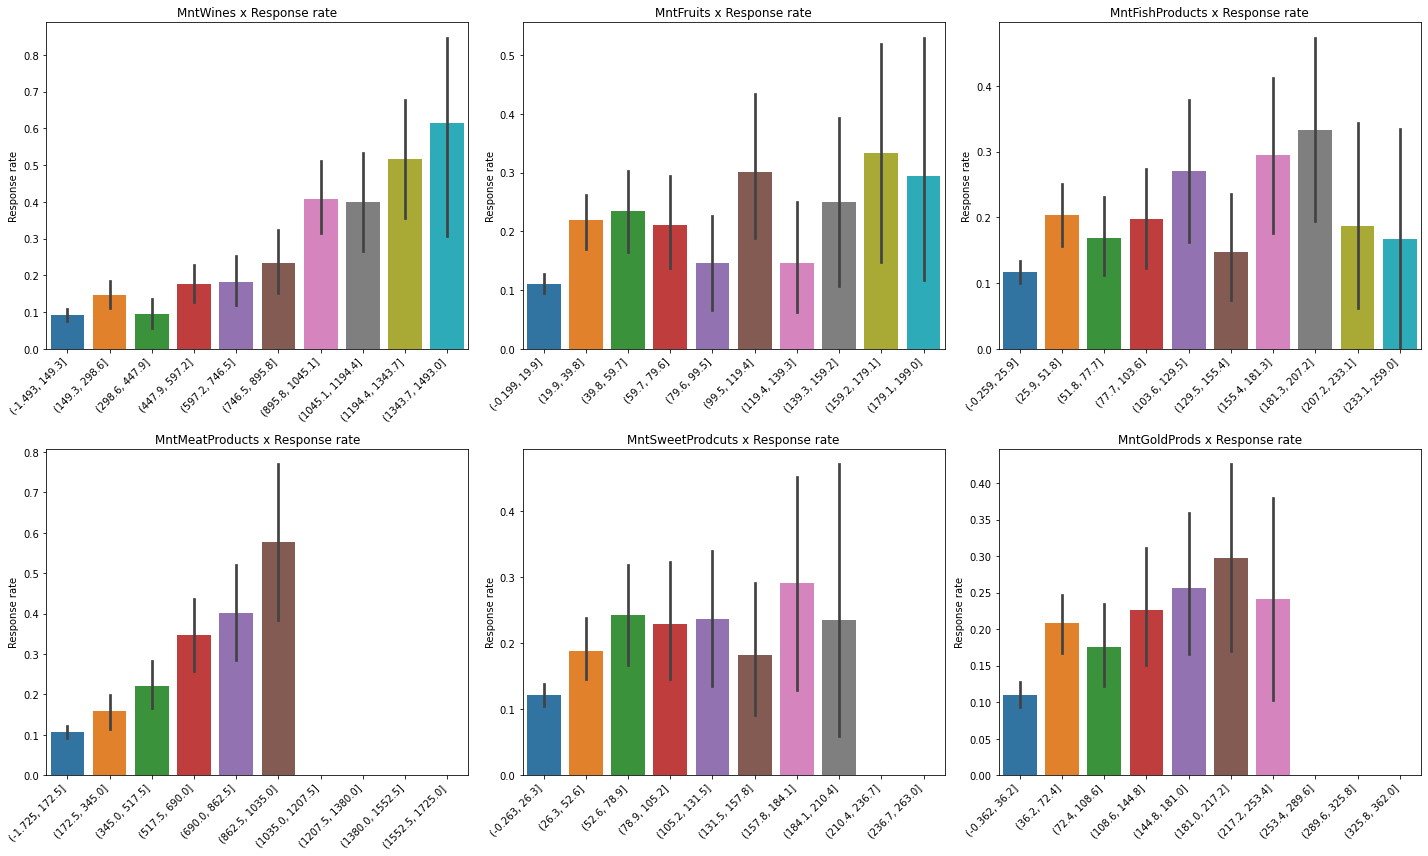

In [29]:
fig, axarr = plt.subplots(2, 3, figsize = (20,12))

# Divide the Amount spent on Wines in ranges.
axarr[0,0].set_title('MntWines x Response rate')
wines_ranges = pd.cut(df.MntWines, 10) 
g = sns.barplot(x = wines_ranges, y = df.Response, ax = axarr[0, 0]).set_ylabel('Response rate')
axarr[0, 0].set_xlabel('')
axarr[0, 0].set_xticklabels(axarr[0, 0].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

axarr[0,1].set_title('MntFruits x Response rate')
fruits_ranges = pd.cut(df.MntFruits, 10) 
g = sns.barplot(x = fruits_ranges, y = df.Response, ax = axarr[0, 1]).set_ylabel('Response rate')
axarr[0, 1].set_xlabel('')
axarr[0, 1].set_xticklabels(axarr[0, 1].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

axarr[0,2].set_title('MntFishProducts x Response rate')
MntFishProducts_ranges = pd.cut(df.MntFishProducts, 10) 
g = sns.barplot(x = MntFishProducts_ranges, y = df.Response, ax = axarr[0, 2]).set_ylabel('Response rate')
axarr[0, 2].set_xlabel('')
axarr[0, 2].set_xticklabels(axarr[0, 2].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

axarr[1,0].set_title('MntMeatProducts x Response rate')
ranges = pd.cut(df.MntMeatProducts, 10)
g = sns.barplot(x = ranges, y = df.Response, ax = axarr[1, 0]).set_ylabel('Response rate')
axarr[1, 0].set_xlabel('')
axarr[1, 0].set_xticklabels(axarr[1, 0].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

axarr[1, 1].set_title('MntSweetProdcuts x Response rate')
ranges = pd.cut(df.MntSweetProducts, 10) 
g = sns.barplot(x = ranges, y = df.Response, ax = axarr[1, 1]).set_ylabel('Response rate')
axarr[1, 1].set_xlabel('')
axarr[1, 1].set_xticklabels(axarr[1, 1].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

axarr[1,2].set_title('MntGoldProds x Response rate')
ranges = pd.cut(df.MntGoldProds, 10)
g = sns.barplot(x = ranges, y = df.Response, ax = axarr[1, 2]).set_ylabel('Response rate')
axarr[1, 2].set_xlabel('')
axarr[1, 2].set_xticklabels(axarr[1, 2].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
fig.tight_layout()

The bins are equally divided in range of data, the MntMeatProducts, MntSweetProducts and MntGoldProds graphs have empty bins, which means that the data is more sparse in this region.

The graphs show that people who usually bought wines and meats products are more likely to buy in the 6th
campaign. Probably advertisement of the gadget made in these segments would produce good results.

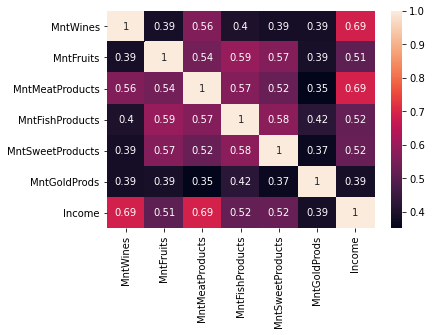

In [30]:
corrMatrix = data_spent[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Income']].corr(method = 'pearson')
sns.heatmap(corrMatrix, annot = True)
plt.show()

Wines and Meats Products appears to have correlation with Income column. The gold products have the poorest correlation with Income.

### 1.7 Complain and Date of Customer Enrollment

Complain parameter is a flag which values 1 if the customer has made a complaint and 0 if the customer hasn't made a complaint in the last 2 years. 

The date of customer enrollment is in object type of data, in order to analyse it, it will be separated into Customer_Year and Customer_Month which are the year and month of customer's enrollment.

0    2216
1      21
Name: Complain, dtype: int64
2013    1188
2014     557
2012     492
Name: Customer_Year, dtype: int64


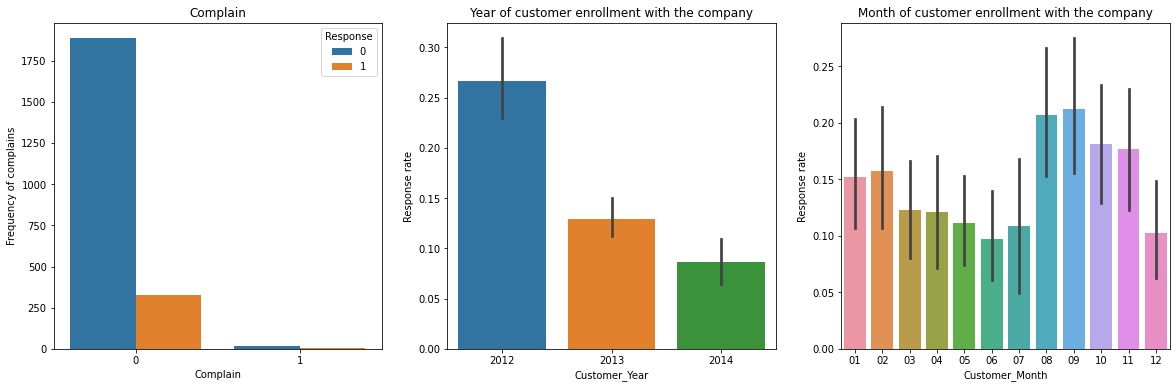

In [31]:
df_complain = data_income.copy()

# Complain is a boolean value - it either made a complain or not
print(df_complain.Complain.value_counts())

fig, axarr = plt.subplots(1, 3, figsize = (20, 6))
axarr[0].set_title('Complain')
y = sns.countplot(x = df_complain.Complain, hue = df_complain.Response, ax = axarr[0]).set_ylabel('Frequency of complains')

# In order to analyse the Date of customer enrollment, it will be separate in its year. The day of the customer enrollment should be irrevalent for our analysis
df_complain['Customer_Year'] = df_complain['Dt_Customer'].apply(lambda x: x.split('-')[0].strip())
axarr[1].set_title('Year of customer enrollment with the company')
y = sns.barplot(x = df_complain.Customer_Year, y = df_complain.Response, ax = axarr[1]).set_ylabel('Response rate')

df_complain['Customer_Month'] = df_complain['Dt_Customer'].apply(lambda x: x.split('-')[1].strip())
axarr[2].set_title('Month of customer enrollment with the company')
y = sns.barplot(x = df_complain.Customer_Month, y = df_complain.Response, ax = axarr[2]).set_ylabel('Response rate')

print(df_complain.Customer_Year.value_counts())

It appears there is no correlation with the Complain parameter, if a person made a complain or didn't made a complain does not influence if they will buy the gadget in the 6th campaign, as is the Customer_Month parameter.

Regarding Customer_Year column, customers who enrolled with the company in 2012 appears to have a higher chance to buy the gadget in the 6th campaign.

### 1.8  Kids and Teens Home

Since both columns Kidhome and Teenhome have similar meaning, they will be analysed together.

0    1291
1     898
2      48
Name: Kidhome, dtype: int64
0    1157
1    1028
2      52
Name: Teenhome, dtype: int64


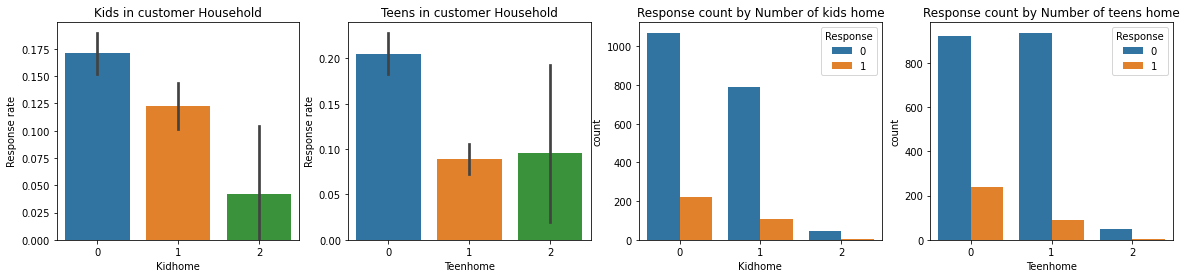

In [32]:
df_child = data_income.copy()

print(df_child['Kidhome'].value_counts())
print(df_child['Teenhome'].value_counts())
# Values vary between 0 and 2 kids/teens in customer household

fig, axarr = plt.subplots(1, 4, figsize = (20, 4))
axarr[0].set_title('Kids in customer Household')
y = sns.barplot(x = df_child.Kidhome, y = df_child.Response, ax = axarr[0]).set_ylabel('Response rate')

axarr[1].set_title('Teens in customer Household')
y = sns.barplot(x = df_child.Teenhome, y = df_child.Response, ax = axarr[1]).set_ylabel('Response rate')

axarr[2].set_title('Response count by Number of kids home')
a = sns.countplot(x = df_child.Kidhome, hue = df_child.Response, ax = axarr[2])

axarr[3].set_title('Response count by Number of teens home')
a = sns.countplot(x = df_child.Teenhome, hue = df_child.Response, ax = axarr[3])

The possible outcomes of both columns are of 2 kids/teens at home, 1 kid/teen at home and no kids/teens at home. Most people do not have kids/teens at home, some have 1 kid/teen and very few have 2 kids/teens.

Response rates of customer who bought the gadget in the 6th campaign and have kids at home appear to be very low.
The highest correlation is with customers who do not have kids or teens at home. This result may be related to the higher marital_status x respose rate of people who declare themselves 'single' or 'divorced', as shown in the graphs below.

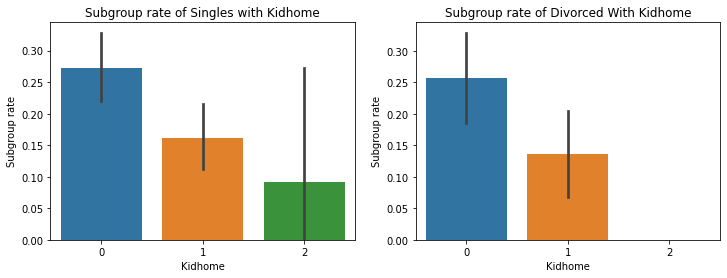

In [33]:
fig, axarr = plt.subplots(1, 2, figsize = (12, 4))
axarr[0].set_title('Subgroup rate of Singles with Kidhome')
y = sns.barplot(x = df_child.Kidhome.loc[df_child.Marital_Status == 'Single'], y = df_child.Response, ax = axarr[0]).set_ylabel('Subgroup rate')
axarr[1].set_title('Subgroup rate of Divorced With Kidhome')
y = sns.barplot(x = df_child.Kidhome.loc[df_child.Marital_Status == 'Divorced'], y = df_child.Response, ax = axarr[1]).set_ylabel('Subgroup rate')

### 1.9  Number of Purchases

This section studies the relation between the number of purchases made through different ways and see if it influences the response in the 6th campaign.

The columns analysed are: NumWebPurchases (number of purchases made in company website), NumCatalogPurchases (number of purchases made using catalogue) and NumStorePurchases (number of purchases made directly in stores).

In [34]:
features = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response']
df_purchase = data_income[features].copy()
print(df_purchase.describe())

store = df_purchase.NumStorePurchases.sum()
web = df_purchase.NumWebPurchases.sum()
catalog = df_purchase.NumCatalogPurchases.sum()
print('\n store = {0} \n web = {1} \n catalog = {2}'.format(store, web, catalog))

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases    Response
count      2237.000000          2237.000000        2237.000000  2237.00000
mean          4.082700             2.664283           5.791238     0.14886
std           2.779115             2.924426           3.252597     0.35603
min           0.000000             0.000000           0.000000     0.00000
25%           2.000000             0.000000           3.000000     0.00000
50%           4.000000             2.000000           5.000000     0.00000
75%           6.000000             4.000000           8.000000     0.00000
max          27.000000            28.000000          13.000000     1.00000

 store = 12955 
 web = 9133 
 catalog = 5960


The main way customers buy product is going to stores, secondly they buy through company website and the least usual way is through catalogue.

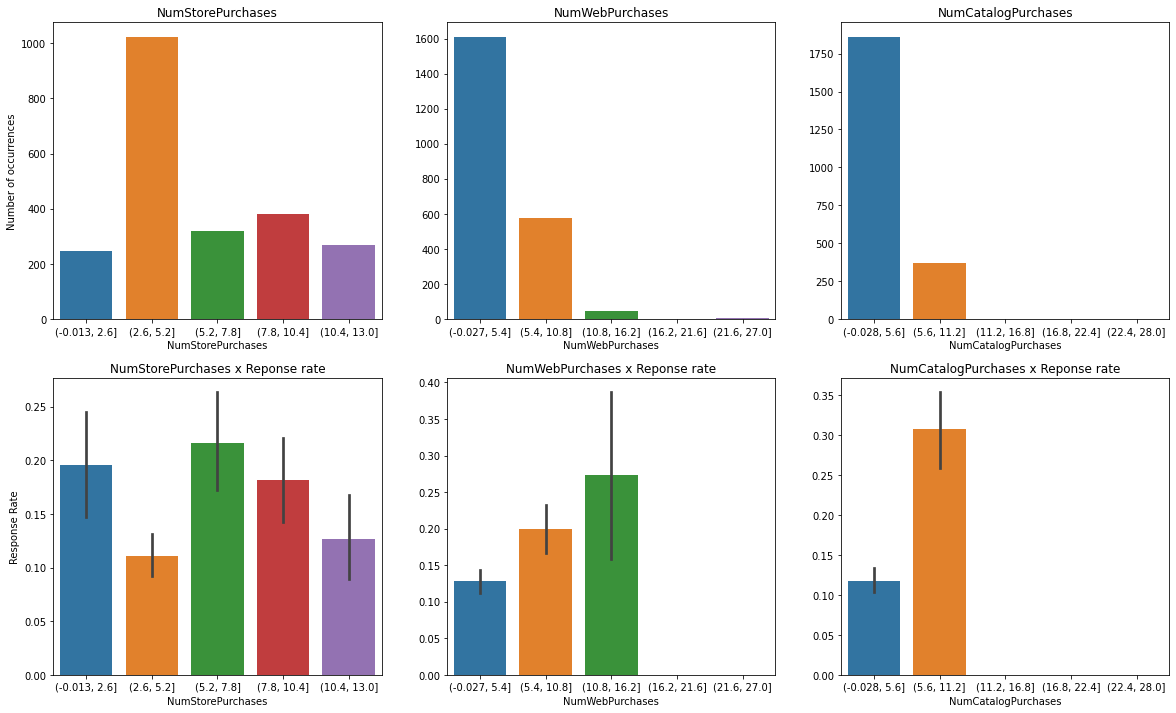

In [35]:
fig, axarr = plt.subplots(2, 3, figsize = (20, 12))

# Divide the Purchases in ranges.
axarr[1, 1].set_title('NumWebPurchases x Reponse rate')
ranges = pd.cut(df_purchase.NumWebPurchases, 5)
g = sns.barplot(x = ranges, y = df_purchase.Response, ax = axarr[1, 1]).set_ylabel('')

axarr[1, 2].set_title('NumCatalogPurchases x Reponse rate')
ranges = pd.cut(df_purchase.NumCatalogPurchases, 5)
g = sns.barplot(x = ranges, y = df_purchase.Response, ax = axarr[1, 2]).set_ylabel('')

axarr[1, 0].set_title('NumStorePurchases x Reponse rate')
ranges = pd.cut(df_purchase.NumStorePurchases, 5)
g = sns.barplot(x = ranges, y = df_purchase.Response, ax = axarr[1, 0]).set_ylabel('Response Rate')

axarr[0, 1].set_title('NumWebPurchases')
ranges = pd.cut(df_purchase.NumWebPurchases, 5)
g = sns.countplot(ranges, ax = axarr[0, 1]).set_ylabel('')

axarr[0, 2].set_title('NumCatalogPurchases')
ranges = pd.cut(df_purchase.NumCatalogPurchases, 5)
g = sns.countplot(ranges, ax = axarr[0, 2]).set_ylabel('')

axarr[0, 0].set_title('NumStorePurchases')
ranges = pd.cut(df_purchase.NumStorePurchases, 5)
h = sns.countplot(ranges, ax = axarr[0, 0]).set_ylabel('Number of occurrences')


The number of Website and Store purchases does not look promising and appear to have no correlation to the reponse target. The purchases made by Catalogue are the least frequent, however it has the highest response rate.

### 1.10 Number of Visits, Purchases made with Discount and Days since last Purchase 

Lastly this analysis is of three different columns.

- Column NumWebVisitsMonth - Number of visits to the company's website in the last month;
- Column NumDealsPurchases - Number of purchases made with discount;
- Column Recency - Number of days since the last purchase. 

(-0.015, 3.0]    1810
(3.0, 6.0]        341
(6.0, 9.0]         62
(9.0, 12.0]        14
(12.0, 15.0]       10
Name: NumDealsPurchases, dtype: int64
(-0.099, 19.8]    454
(39.6, 59.4]      450
(19.8, 39.6]      449
(79.2, 99.0]      447
(59.4, 79.2]      437
Name: Recency, dtype: int64
(4.0, 8.0]      1353
(-0.02, 4.0]     789
(8.0, 12.0]       86
(16.0, 20.0]       6
(12.0, 16.0]       3
Name: NumWebVisitsMonth, dtype: int64


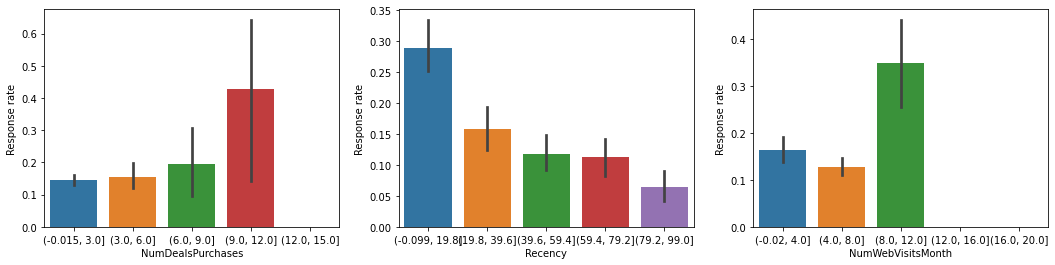

In [36]:
features_num = ['NumDealsPurchases', 'Recency', 'NumWebVisitsMonth', 'Response']
df_num = data_income[features_num].copy()

fig, axarr = plt.subplots(1, 3, figsize = (18, 4))
axarr[0].set_title('')
ranges = pd.cut(df_num.NumDealsPurchases, 5)
y = sns.barplot(x = ranges, y = df_num.Response, ax = axarr[0]).set_ylabel('Response rate')
print(ranges.value_counts())

axarr[1].set_title('')
ranges = pd.cut(df_num.Recency, 5)
y = sns.barplot(x = ranges, y = df_num.Response, ax = axarr[1]).set_ylabel('Response rate')
print(ranges.value_counts())

axarr[2].set_title('')
ranges = pd.cut(df_num.NumWebVisitsMonth, 5)
y = sns.barplot(x = ranges, y = df_num.Response, ax = axarr[2]).set_ylabel('Response rate')
print(ranges.value_counts())

The Recency data is evenly distributed, so each of its 5 ranges contains around the same amount of customer. The Recency vs. reponse rate barplot shows that the highest rate positive response occurs with customers who bought something recently, the longer they stay without buying the less likely they are to buy again.

The Number of Discount Purchases data shows that most customers made few purchases with discount. The highest response rate is in the range of 9 to 12 number of discount purchases, though the number of users in this category are of only 10 customers, which turn this data not too reliable and with high uncertainty.

The greater part of the customers visited the company website at least 4 times, it surpasses the number of customer who never visited the website. So even though the higher number of sales is in store sellings, a high number of customers visit the website. In this way the website holds a good place for advertisement. 

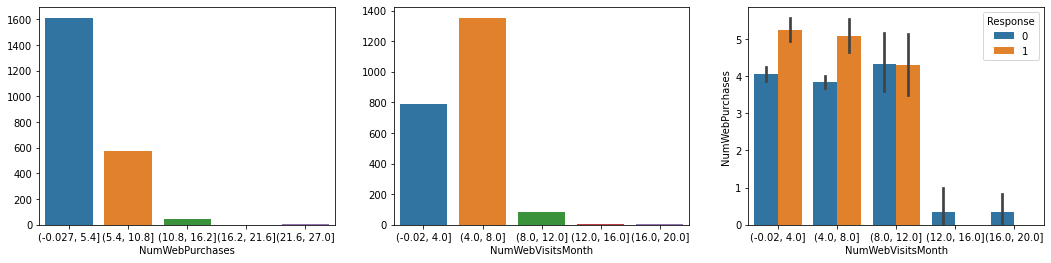

In [37]:
fig, axarr = plt.subplots(1, 3, figsize = (18, 4))

axarr[0].set_title('')
ranges_webpurchases = pd.cut(df_purchase.NumWebPurchases, 5)
g = sns.countplot(ranges_webpurchases, ax = axarr[0]).set_ylabel('')

axarr[1].set_title('')
ranges_webvisits = pd.cut(df_num.NumWebVisitsMonth, 5)
g = sns.countplot(ranges_webvisits, ax = axarr[1]).set_ylabel('')

axarr[2].set_title('')
y = sns.barplot(x = ranges_webvisits, y = df_purchase.NumWebPurchases, hue = df_num.Response, ax = axarr[2])

## Conclusion

Data analysis showed that it is possible to define a segmentation of the customer most likely to buy in the 6th campaign:

- Customers with high or very high income (higher than one standard deviation)

 -  Usually these people are single or divorced and they have a high level of education
 
- Customers who bought in previous campaigns

- Customers who spend in wines and meat products

- Older customers are more likely to purchase

- Without children or teenagers at home

The analysis also shows that advertisement in some key segments may produce better results.

### Marketing Costs x Revenue

According to the company the total cost of the sample campaign was 6.720MU and the revenue generated by the customers who accepted the offer was 3.674MU. 

In this way the mean cost for each person is: $\frac{6.720}{2240} = 3$ MU 

The revenue generated for each person who purchased the gadget (total of 336 customers): $\frac{3.674}{336} = 10.9$ MU

The ratio of cost/revenue = 3.6, so for each person who buys, the company can have 2.6 person who does not in a no profit case. 

It is important to know what are the strategic planning of the company: maximize the profit now or invest and grow in the long term. Even if the person does not purchase the deal they may contribute to an organic growth of the product and brand.



## Part 2 - Predictive Model

This is a Classifier problem, the target column is binary and unbalanced (has a much higher number of zeros than ones)

The model will be validated through cross validation method instead of classical train/test method due to the low number of entries. The cross validation method manages to use the entire data set for training.

Categorical columns and Numerical columns will be segregated and treated differently.

The Z_Revenue and Z_CostContact does not provide useful information for the model since it assumes the same number for the whole data set, the Z_Revenue could also be a cause of data leakage. These both columns will be droped from the data set.

For the type of classifier model used, it was chosen not to use a exact classification model, but as it is wanted to see customer most likely to purchase the gadget in the 6th campaign it was used a regressor model with scores for each customer. Customer with higher score are more likely to buy in the last campaign. Therefore, it is possible to select the most likely to buy customers according to the marketing budget available.

Score metric used was the area under the Area Under the Receiver Operating Characteristic Curve (ROC AUC).

In [47]:
data_customer = data_spent.copy()
data_customer['Dt_Customer'] = data_spent.Dt_Customer.map(lambda x: x.replace("-", "")).astype(int)

df = data_customer.copy()
df.drop(['Z_Revenue', 'Z_CostContact'], axis = 1, inplace = True)

y = df.Response
X = df.drop('Response', axis = 1)

numerical_cols = [col for col in X.columns if X[col].dtype in ['float64', 'int64']] 

categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

all_cols = numerical_cols + categorical_cols

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown = 'ignore', sparse = False)) 
])

num_transformer = SimpleImputer(strategy = 'mean')

preprocessing_data = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categorical_cols),
    ('num', num_transformer, numerical_cols)
])

my_pipeline = Pipeline(steps = [
    ('preprocessing', preprocessing_data),
    ('model', RandomForestRegressor(n_estimators = 300, random_state = 2))
])

# Check if the parameters and model looks good
scores = cross_val_score(my_pipeline, X, y, cv = 9, scoring = 'roc_auc')
print("scores_mean = {0}" .format(scores.mean()))

# Fit model for future prediction
my_pipeline.fit(X, y);


scores_mean = 0.880198488035442
